<a href="https://www.kaggle.com/code/abdalrhamnhebishy/clustering?scriptVersionId=215340546" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
from IPython.core.display import HTML
# Apply styles globally within the notebook
HTML('''
<style>
  h2 {
    font-size: var(--j3p-content-font-size4);
    background-color:#33ffc1;
    color: white;
    display: flex;
    align-items: center;
    justify-content: center;
    padding: 10px 41px;
    top: 10px;
    position: relative;
    border-radius: 10px 50px 10px 50px;
}

 img {       /* flex-grow: 1; */
            /* flex-shrink: 1; */
            border-radius: 100px 70px 150px 70px; 
            border: 10px solid #eee;
            display: flex;
            align-items: center;
            justify-content: center;
            transition: box-shadow 0.3s ease; /* Add a transition for a smooth effect */
        }

       img:active {
          box-shadow: 0 10px 20px rgba(173, 216, 230, 1) 0 6px 6px rgba(0, 0, 255, 1.0
173, 216, 230, 1);
        }
video {
    width: 820px; /* Set the width of the video */
    height: auto; /* Adjust the height automatically */
    border-radius: 25px; /* Add a border radius for rounded corners */
    border: 5px solid #eee; /* Add a border */
    box-shadow: 0 10px 20px rgba(173, 216, 230, 1), 0 6px 6px rgba((0, 0, 255, 1.0)); /* Add a box shadow */
    display: flex;
    controls: autoplay;
    align-items: center;
    justify-content: center;
    transition: box-shadow 0.3s ease; /* Add a transition for a smooth effect */
  }

  video:active {
    box-shadow: 0 10px 20px rgba(173, 216, 230, 1), 0 6px 6px rgba();
  }


</style>
''')  

## Mall Custemers Clustering :

<img src="https://media.istockphoto.com/id/1368994091/photo/couple-shopping-using-phone-application-holding-shopper-bags-in-mall.jpg?s=612x612&w=0&k=20&c=AnmKCImJhAqQzFQXh1xUZ9M0oLGGbrxpbfYmlXoGrYE=" alt="My Image">

## Table of Contents 

<div style="border: 2px solid red; padding: 10px; background-color: #F5F5F5; color: black; border-radius: 30px 45px 30px 45px;">

   
    
    
<p> &bull;        <a target="_blank"> Introudction</a>  </p> 

<p> &bull;      <a target="_blank"> Explanory Data Analysis</a>  </p>

<p>&bull;       <a target="_blank"> Data Processing</a>  </p>

<p>&bull;       <a target="_blank"> Model Bulding KMeans , Agglomerative and DBSCAN</a> </p>   
    
<p>&bull;       <a target="_blank">Visualize the clusters & Dendrogram </a> </p>   

</div>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.graph_objs import *
import plotly.express as px 
import plotly.graph_objects as go
from sklearn.cluster import DBSCAN ,KMeans,AgglomerativeClustering
import scipy.cluster.hierarchy as sc
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')



In [3]:
#load the Data :

data=pd.read_csv("Mall_Customers.csv").head(10)
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


## Explore the Data :

In [4]:
#get info about the dataset:
print(data.info())
print("-"*25)
# to know more about the shape of the dataset:
print("shape of the dataset -->>",np.shape(data))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              10 non-null     int64 
 1   Gender                  10 non-null     object
 2   Age                     10 non-null     int64 
 3   Annual Income (k$)      10 non-null     int64 
 4   Spending Score (1-100)  10 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 528.0+ bytes
None
-------------------------
shape of the dataset -->> (10, 5)


In [5]:
#get the statistical:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,10.0,5.5,3.027650,1.0,3.25,5.5,7.75,10.0
Age,10.0,28.8,13.464356,19.0,21.25,23.0,30.75,64.0
Annual Income (k$),10.0,17.0,1.490712,15.0,16.00,17.0,18.00,19.0
Spending Score (1-100),10.0,49.4,35.094159,3.0,14.25,56.0,76.75,94.0


In [6]:
# get Types of features:

data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [7]:
# know the number of every item in every column:

for col in data.columns:
    print(f"counts of items in {col} -->> \n {data[col].value_counts()}")
    print("-"*25)

counts of items in CustomerID -->> 
 CustomerID
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
Name: count, dtype: int64
-------------------------
counts of items in Gender -->> 
 Gender
Female    7
Male      3
Name: count, dtype: int64
-------------------------
counts of items in Age -->> 
 Age
23    2
19    1
21    1
20    1
31    1
22    1
35    1
64    1
30    1
Name: count, dtype: int64
-------------------------
counts of items in Annual Income (k$) -->> 
 Annual Income (k$)
15    2
16    2
17    2
18    2
19    2
Name: count, dtype: int64
-------------------------
counts of items in Spending Score (1-100) -->> 
 Spending Score (1-100)
6     2
39    1
81    1
77    1
40    1
76    1
94    1
3     1
72    1
Name: count, dtype: int64
-------------------------


In [8]:
# to know the uniques values in evey column in the dataset:
for col in data.columns:
    print(f"All items in the ---->>>{col} column  :  \n{data[col].unique()}")
    print("*"*50)

All items in the ---->>>CustomerID column  :  
[ 1  2  3  4  5  6  7  8  9 10]
**************************************************
All items in the ---->>>Gender column  :  
['Male' 'Female']
**************************************************
All items in the ---->>>Age column  :  
[19 21 20 23 31 22 35 64 30]
**************************************************
All items in the ---->>>Annual Income (k$) column  :  
[15 16 17 18 19]
**************************************************
All items in the ---->>>Spending Score (1-100) column  :  
[39 81  6 77 40 76 94  3 72]
**************************************************


In [9]:
# Extract all Types of columns from the data :
for col in data.columns:
    obj_cols=data.select_dtypes("object").columns

    num_cols=data.select_dtypes("number").columns

    disc_cols=data.select_dtypes(include=("int64")).columns

    conts_cols=data.select_dtypes(include=("float64")).columns

    Nomial_cols=data.nunique()[data.nunique()<3]

print(f"object_columns ----->>> {obj_cols}\n Numerical_columns ----->>> {num_cols} \n Discrete_columns ---->>> {disc_cols} \n Continous_cols ----->> {conts_cols} \n Nominal Columns --->> {Nomial_cols}")

object_columns ----->>> Index(['Gender'], dtype='object')
 Numerical_columns ----->>> Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object') 
 Discrete_columns ---->>> Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object') 
 Continous_cols ----->> Index([], dtype='object') 
 Nominal Columns --->> Gender    2
dtype: int64


In [10]:
# encoder the data :

data=pd.get_dummies(data)
data

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,False,True
1,2,21,15,81,False,True
2,3,20,16,6,True,False
3,4,23,16,77,True,False
4,5,31,17,40,True,False
5,6,22,17,76,True,False
6,7,35,18,6,True,False
7,8,23,18,94,True,False
8,9,64,19,3,False,True
9,10,30,19,72,True,False


## DBSCAN Algorithm

In [11]:
from sklearn.cluster import DBSCAN
model=DBSCAN(eps=10,min_samples=7)
model.fit(data)

DBSCAN(eps=10, min_samples=7)

In [12]:
y_pred=model.fit_predict(data)

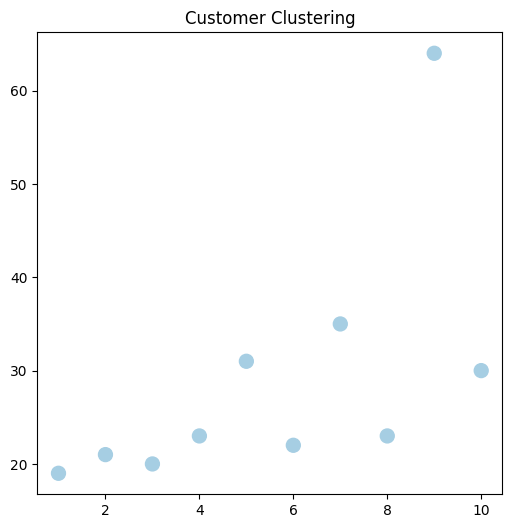

In [13]:
plt.figure(figsize=(6, 6))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=y_pred, s=100, cmap='Paired')
plt.title("Customer Clustering")
plt.show()


## K-means

In [14]:
model= KMeans(n_clusters=5,init='k-means++',random_state=42)
model.fit(data)
y_pred=model.predict(data)

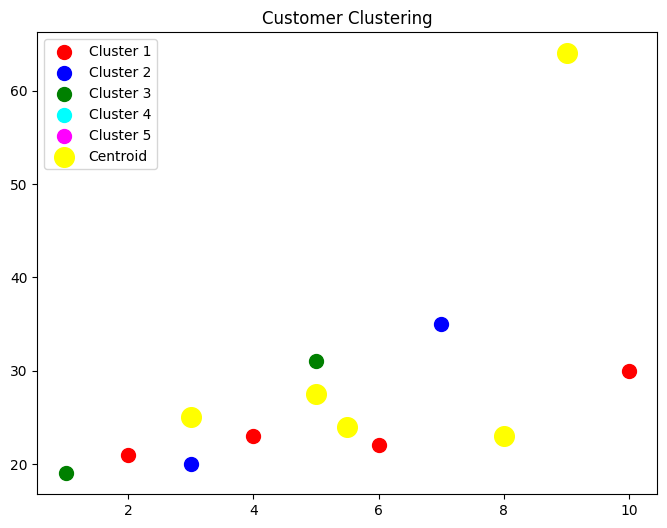

In [18]:
# Convert data to a NumPy array if it is a Pandas DataFrame
data_np = data.to_numpy() if hasattr(data, 'to_numpy') else data

# Convert y_pred to a NumPy array if it is a Pandas Series
y_pred_np = y_pred.to_numpy() if hasattr(y_pred, 'to_numpy') else y_pred

# Plot each cluster
plt.figure(figsize=(8, 6))
plt.scatter(data_np[y_pred_np == 0, 0], data_np[y_pred_np == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(data_np[y_pred_np == 1, 0], data_np[y_pred_np == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(data_np[y_pred_np == 2, 0], data_np[y_pred_np == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(data_np[y_pred_np == 3, 0], data_np[y_pred_np == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(data_np[y_pred_np == 4, 0], data_np[y_pred_np == 4, 1], s=100, c='magenta', label='Cluster 5')

# Plot the centroids
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=200, c='yellow', label='Centroid')

# Add title and legend
plt.title("Customer Clustering")
plt.legend()
plt.show()


## K-means (determine k (number of clusters ) - elbow method :

In [19]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  model=KMeans(n_clusters=i,init='k-means++',random_state=42)
  model.fit(data)
  wcss.append(model.inertia_)

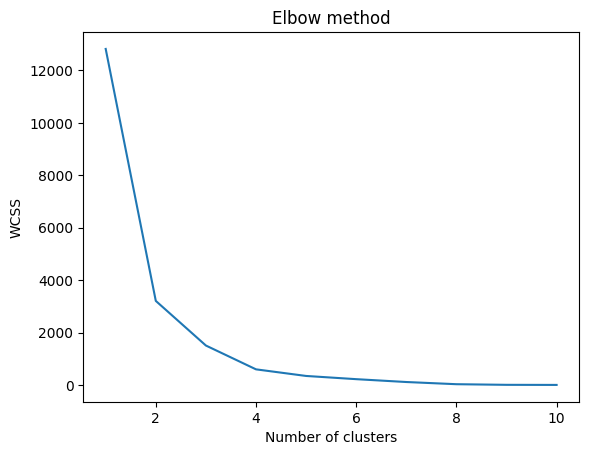

In [20]:
plt.plot(range(1,11),wcss)
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [21]:
model=KMeans(n_clusters=3,init='k-means++',random_state=42)
model.fit(data)
labels=model.labels_
labels

array([2, 0, 1, 0, 2, 0, 1, 0, 1, 0], dtype=int32)

## Hierarical (Agglomerative)

Text(0, 0.5, 'Euclidean distance')

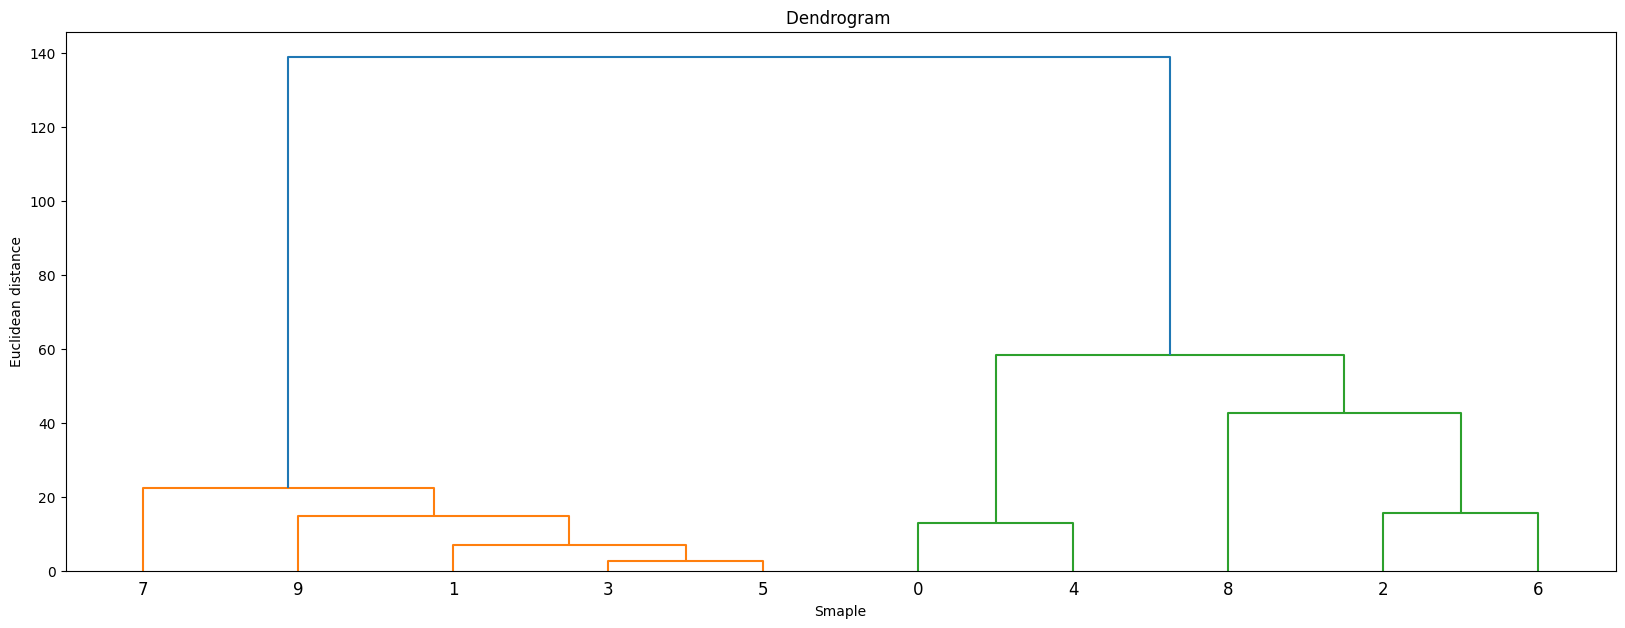

In [22]:
import scipy.cluster.hierarchy as sc

#plot dendrogram

plt.figure(figsize=(20,7))
plt.title("Dendrogram ")

#create dendrogram
sc.dendrogram(sc.linkage(data,method='ward'))
plt.title("Dendrogram ")
plt.xlabel('Smaple')
plt.ylabel("Euclidean distance")

In [23]:
from sklearn.cluster import AgglomerativeClustering

model=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')

model.fit(data)
labels=model.labels_
labels

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1])

## Created By  : Eng/AbdalRhman Gameel Ahmed Hebishy 


<div style="border: 5px solid yellow; padding: 10px; background-color: #F5F5DC; color: blue; border-radius: 30px 45px 30px 45px;">


<img src="https://t4.ftcdn.net/jpg/04/00/26/99/360_F_400269908_gDF8JR2ctyHWiL1kww6WEWBerRzD5MBb.jpg" alt="My Image">

<p>&bull;  AbdalRhman Hebishy , DataScientist||Machine learning||Deeplearning Engineer 💻💻 .</p>

<p>&bull; <a href="https://www.kaggle.com/abdalrhamnhebishy" target="_blank">Kaggle profile 🔍</a>.</p>

<p>&bull; <a href="https://github.com/AbdalRahmna " target="_blank">Github profile 🐱</a>.</p>

<p>&bull; <a href="https://www.linkedin.com/in/abdalrahman-hebishy-06465b254/"_blank">linkedin profile 🧑‍💼</a>.</p>


</div>
